In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
# Import the MNIST Dataset
mnist = fetch_openml('mnist_784', version=1)

/Users/gloriahwoang/Library/Python/3.9/lib/python/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
# Show the keys in the dataset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
# We want to grab the data and the target as X and y, respectively.
X,y = mnist["data"], mnist["target"]

# Check the size of X
X.shape

(70000, 784)

In [7]:
# Check the size of y
y.shape

(70000,)

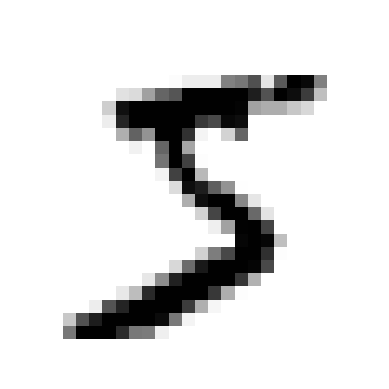

In [8]:
# Let's visualize one
some_digit = X.loc[0].array
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis('off')
plt.show()

In [9]:
# Check the y
y[0]

'5'

In [10]:
# Since y is a string, convert it to an integer.
y = y.astype(np.uint8)

In [11]:
# Check that y is an integer.
y[0]

5

In [12]:
# The MNIST dataset is already split into a training set and test set (first 60,000 images and last 10,000, respectively).
# The training set is already shuffled for us, which guarantees that all cross-validation folds will be similar (we don't want one fold to be missing some digits)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary Classifier

In [13]:
# Let's simplify the problem and identify one digit - ex/ 5 - binary classifier - 5 and not 5
# Create the target vectors for this classification
y_train_5 = (y_train == 5 ) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5 )

In [14]:
# Let's first examine the Stocastic Gradient Descenet (SGD) Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit (X_train, y_train_5)

SGDClassifier()

In [15]:
# Let's see if it detects our number 5 correctly. The output should be 'True'
sgd_clf.predict([some_digit])

/Users/gloriahwoang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [16]:
# Performance Measures - Cross-Validation
# Let's use the cross_val_score function to evaluate our model using K-fold cross-validation with three folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9689 , 0.9679 , 0.95295])

Very good! all above 96%. But we are not happy too soon bc in this kind of dataset, only about 10% or less of the images are 
actually 5s. So if you guess that an image is not a 5, you will be right about 90% of the time. So accuracy is not the 
preferred measure of performance for classifiers, esp. when you are dealing with skewed datasets like these.

A better way to evaluate might be a confusion matrix.

In [17]:
# Let's get a set of predictions first - the cross_val_predict returns the predictions made on each test fold.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict (sgd_clf, X_train, y_train_5, cv=3)

In [18]:
# Now let's grab the confusion matrix with our predictions
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[51443,  3136],
       [  925,  4496]])

53450 True Negatives

1129 False Positives

1259 False Negatives

4162 True Positives

Precision = 4162 / (4162 + 1129) = 0.7866

Recall = 4162 / (4162 + 1259) = 0.7677

In [19]:
from sklearn.metrics import precision_score, recall_score
print('The Precision Score is: ', precision_score(y_train_5, y_train_pred))
print('The Recall Score is: ', recall_score(y_train_5, y_train_pred))

The Precision Score is:  0.589098532494759
The Recall Score is:  0.8293672754104409


In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.6888837815061671

# KNN Classification

In [31]:
# Import Libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [23]:
%time

# Grid Search Part 1

knn = KNeighborsClassifier()
k_range = list(range(1, 25))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True,verbose=1)
  
# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 7.15 µs
Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [24]:
print(grid_search.best_params_)

{'n_neighbors': 3}


In [25]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 96.82%


Can we do better? Let's search for better k value.

In [26]:
# Grid Search Part 2
%time

knn = KNeighborsClassifier()
k_range_2 = list(range(26, 40))
param_grid_2 = dict(n_neighbors=k_range_2)
  
# defining parameter range
grid_2 = GridSearchCV(knn, param_grid_2, cv=3, scoring='accuracy', return_train_score=True,verbose=1)
  
# fitting the model for grid search
grid_search_2 = grid_2.fit(X_train, y_train)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 10.7 µs
Fitting 3 folds for each of 14 candidates, totalling 42 fits


In [27]:
print(grid_search_2.best_params_)
accuracy_2 = grid_search_2.best_score_ *100
print("Accuracy for our training dataset with tuning part 2 is : {:.2f}%".format(accuracy_2) )

{'n_neighbors': 26}
Accuracy for our training dataset with tuning part 2 is : 95.36%


In [28]:
# Check Accuracy on Test Data with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_test_hat=knn.predict(X_test) 
test_accuracy=accuracy_score(y_test,y_test_hat)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 98.66%


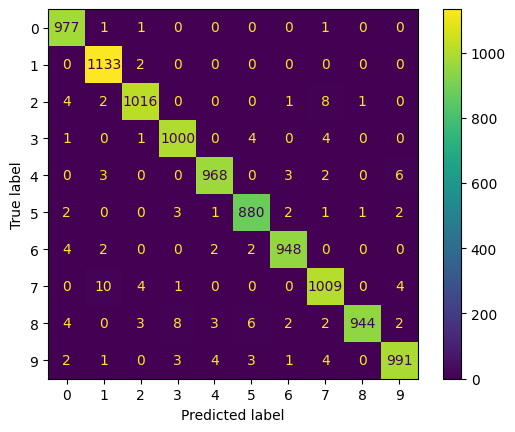

In [32]:
cm = confusion_matrix(y_test, y_test_hat, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

# 98.66% Accuracy. Pretty Good, but can we improve the accuracy even more?